In [14]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

In [15]:
df = pd.read_csv('../data_movies/christmas_movies.csv')
df.head(2)

,title,rating,runtime,imdb_rating,meta_score,genre,release_year,description,director,stars,votes,gross,img_src,type
0,Love Actually,R,135.0,7.6,55.0,"Comedy, Drama, Romance",2003.0,Follows the lives of eight very different coup...,Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...","491,920",$59.70M,https://m.media-amazon.com/images/M/MV5BMTY4Nj...,Movie
1,National Lampoon's Christmas Vacation,PG-13,97.0,7.5,49.0,Comedy,1989.0,The Griswold family's plans for a big family C...,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...","198,428",$71.32M,https://m.media-amazon.com/images/M/MV5BMGZkMW...,Movie


## EDA process begins

In [16]:
df.shape

(788, 14)

In [17]:
df.duplicated().sum()

0

##### There are no duplicate values ​​but there are null values. We delete columns with a very high percentage of nulls.

In [18]:
df.drop(['meta_score', 'gross'], axis = 1, inplace = True)

In [19]:
df.head(2)

,title,rating,runtime,imdb_rating,genre,release_year,description,director,stars,votes,img_src,type
0,Love Actually,R,135.0,7.6,"Comedy, Drama, Romance",2003.0,Follows the lives of eight very different coup...,Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...","491,920",https://m.media-amazon.com/images/M/MV5BMTY4Nj...,Movie
1,National Lampoon's Christmas Vacation,PG-13,97.0,7.5,Comedy,1989.0,The Griswold family's plans for a big family C...,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...","198,428",https://m.media-amazon.com/images/M/MV5BMGZkMW...,Movie


In [20]:
((df.isnull().sum()) / len(df)) * 100

title            0.000000
rating          18.020305
runtime          4.949239
imdb_rating      4.949239
genre            0.126904
release_year     1.015228
description      0.000000
director         0.634518
stars            1.522843
votes            4.949239
img_src          0.000000
type             0.000000
dtype: float64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         788 non-null    object 
 1   rating        646 non-null    object 
 2   runtime       749 non-null    float64
 3   imdb_rating   749 non-null    float64
 4   genre         787 non-null    object 
 5   release_year  780 non-null    float64
 6   description   788 non-null    object 
 7   director      783 non-null    object 
 8   stars         776 non-null    object 
 9   votes         749 non-null    object 
 10  img_src       788 non-null    object 
 11  type          788 non-null    object 
dtypes: float64(3), object(9)
memory usage: 74.0+ KB


##### The column 'release_year', 'runtime' and 'votes' are not the correct data type. We change them.

In [22]:
#replace non-finite values ​​with null values 
df = df.replace([np.inf, -np.inf], np.nan).dropna()

In [23]:
df['release_year'] = df['release_year'].astype('int')

In [24]:
df['votes'] = df['votes'].str.replace(',', '').astype('int')

In [25]:
df['runtime'] = df['runtime'].astype('int')

In [26]:
df.dtypes

title            object
rating           object
runtime           int32
imdb_rating     float64
genre            object
release_year      int32
description      object
director         object
stars            object
votes             int32
img_src          object
type             object
dtype: object

In [27]:
df.head(2)

,title,rating,runtime,imdb_rating,genre,release_year,description,director,stars,votes,img_src,type
0,Love Actually,R,135,7.6,"Comedy, Drama, Romance",2003,Follows the lives of eight very different coup...,Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",491920,https://m.media-amazon.com/images/M/MV5BMTY4Nj...,Movie
1,National Lampoon's Christmas Vacation,PG-13,97,7.5,Comedy,1989,The Griswold family's plans for a big family C...,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...",198428,https://m.media-amazon.com/images/M/MV5BMGZkMW...,Movie


### Outliers

In [28]:
numerics = df.select_dtypes(include = ['int', 'float'])

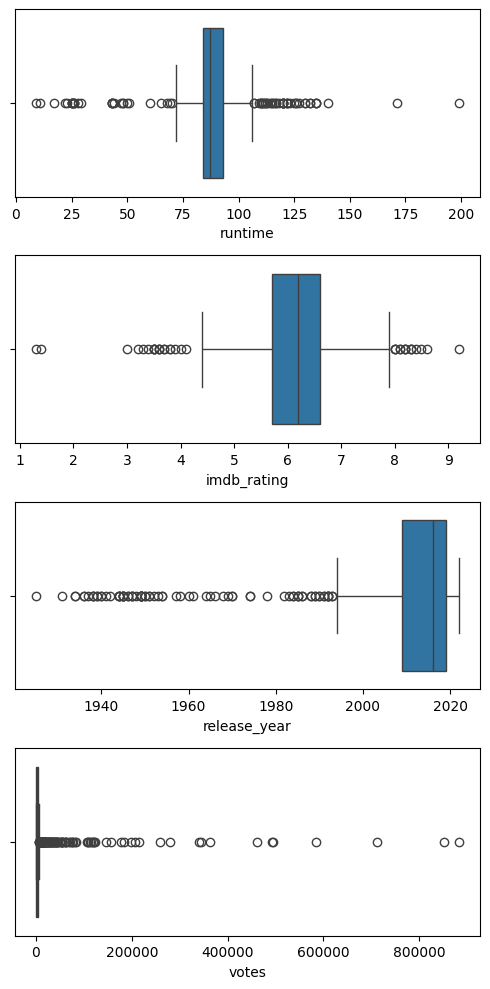

In [29]:
fig, ax = plt.subplots(4, 1, figsize=(5,10))

for i in range(len(numerics.columns)):
    sns.boxplot(x=numerics.columns[i], data=numerics, ax=ax[i])
    
plt.tight_layout()

##### There are many outliers but they make sense, so we won't cover them.

In [30]:
df['rating'].unique()

array(['R', 'PG-13', 'PG', 'Not Rated', 'G', 'TV-G', 'TV-PG', 'TV-MA',
       'Passed', 'Approved', '6', 'AL', 'Unrated', 'TV-14', '7+', 'TV-Y'],
      dtype=object)

#### In the 'rating' column the films are classified based on the classification of different countries. We unify them.

In [31]:
def rating_change(rating):
    """ This function replaces one text with another.

    Args:
        rating (string): text that we are going to modify

    Returns:
        string: modified text
    """
    
    if rating == 'R' or rating == 'TV-MA':
        return '17 years or more'
        
    elif rating == 'PG' or rating == 'TV-PG':
        return 'parental guide'
        
    elif rating == 'G' or rating == 'TV-G' or rating == 'Passed' or rating == 'Approved' or rating == 'AL' or rating == 'TV-Y': 
        return 'All public'
        
    elif rating == 'Not Rated' or rating == 'Unrated':
        return 'unclassified'
        
    elif rating == 'PG-13':
        return '13 years or more'
    
    elif rating == '6':
        return '6 years or more'
        
    elif rating == 'TV-14':
        return '14 years or more'
        
    elif rating == '7+':
        return '7 years or more'

In [32]:
df['rating'] = df['rating'].apply(rating_change)

In [33]:
df.head(2)

,title,rating,runtime,imdb_rating,genre,release_year,description,director,stars,votes,img_src,type
0,Love Actually,17 years or more,135,7.6,"Comedy, Drama, Romance",2003,Follows the lives of eight very different coup...,Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",491920,https://m.media-amazon.com/images/M/MV5BMTY4Nj...,Movie
1,National Lampoon's Christmas Vacation,13 years or more,97,7.5,Comedy,1989,The Griswold family's plans for a big family C...,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...",198428,https://m.media-amazon.com/images/M/MV5BMGZkMW...,Movie


In [34]:
df['rating'].unique()

array(['17 years or more', '13 years or more', 'parental guide',
       'unclassified', 'All public', '6 years or more',
       '14 years or more', '7 years or more'], dtype=object)

#### The 'description' column contains a series of genres to which the film belongs. We will separate it to simplify the subsequent visual analysis.

In [35]:
def genre(df,pattern,column):
    """This function separates a list of items by commas and creates a new row for each of the items in the list.

    Args:
        df (dataframe): dataframe that we will modify
        pattern (string): pattern by which we will separate the list
        column (string): name of the column that we will modify

    Returns:
        dataframe: modified data frame
    """
    
    df[column] = df[column].str.split(pattern, n = -1) 
    
    return df.explode(column)

In [36]:
clean_df = genre(df, ', ', 'genre')

In [37]:
clean_df.head(2)

,title,rating,runtime,imdb_rating,genre,release_year,description,director,stars,votes,img_src,type
0,Love Actually,17 years or more,135,7.6,Comedy,2003,Follows the lives of eight very different coup...,Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",491920,https://m.media-amazon.com/images/M/MV5BMTY4Nj...,Movie
0,Love Actually,17 years or more,135,7.6,Drama,2003,Follows the lives of eight very different coup...,Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",491920,https://m.media-amazon.com/images/M/MV5BMTY4Nj...,Movie


In [234]:
clean_df.to_csv('../clean_data_movies/clean_christmas_movies.csv')